# ----------------- Collinear features and their effect on linear models----------------

In [68]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
data = pd.read_csv('task_d.csv') #loading data

In [70]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [71]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values
#X.shape
feature_names=data.columns[:-1]


In [72]:
# unquotes to see how our model performs while data with non collinear features

'''X = data.drop(["x*x","2*y","2*z+3*x*x",'target'], axis=1).values         #dropping collinear features
Y = data['target'].values

feature_names=["x","y","z","w"]
X.shape'''

'X = data.drop(["x*x","2*y","2*z+3*x*x",\'target\'], axis=1).values         #dropping collinear features\nY = data[\'target\'].values\n\nfeature_names=["x","y","z","w"]\nX.shape'

#### Task: 1 Logistic Regression

# 1)Finding the Correlation between the features

In [73]:
data.corr()    #getting correlation of features

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


### Heatmap

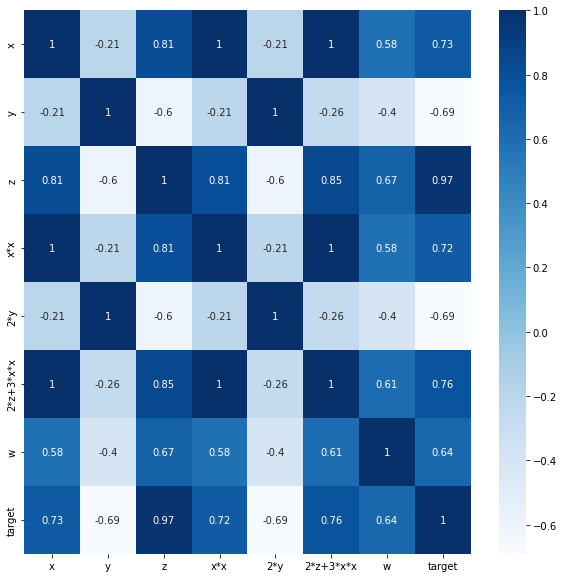

In [74]:
plt.figure(figsize = (10,10))  #how to draw correlation heatmap: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
dataplot = sns.heatmap(data.corr(), cmap="Blues", annot=True)

# 2) Finding the best model for the given data

 alpha ---->  [1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
 log(alpha)---->   [-5.      -4.      -3.30103 -3.      -2.30103 -2.      -1.30103 -1.
 -0.30103  0.       0.69897  1.       1.69897  2.     ]


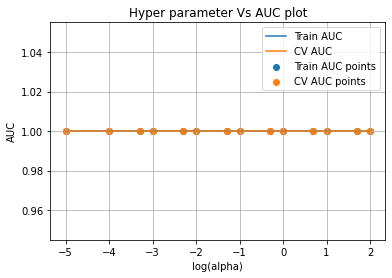

In [75]:
parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
lr=SGDClassifier(loss="log_loss")                                                 #Logistic regression
clf=GridSearchCV(lr,parameters,cv=3, scoring='roc_auc',return_train_score=True)   #hyper parameter tuning

clf.fit(X, Y)                                      #fitting the LR model with train data

results = pd.DataFrame.from_dict(clf.cv_results_)   #storing Gridsearch results

results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']       #storing required Gridsearch results in required variable
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
#cv_auc_std= results['std_test_score']
alpha =  results['param_alpha'].tolist()
print(" alpha ----> ",alpha)
print(" log(alpha)---->  ",np.log10(alpha))

plt.plot(np.log10(alpha), train_auc, label='Train AUC')   #plotting auc vs log(alpha) values
plt.plot(np.log10(alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(alpha), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

### Fitting the best model with the original data and getting weight vector

In [76]:
best_model=SGDClassifier(loss="log_loss",alpha=1)     #finding best model with best alpha

best_model.fit(X,Y)                                    #fitting the best model
best_model_accuracy=best_model.score(X, Y)
weights=best_model.coef_


# 3) modifying the original data(pertubation) and with that fitting the best model again 

In [77]:
X_pretubated=X+0.01            #adding small noise to data X

In [78]:
best_model=SGDClassifier(loss="log_loss",alpha=1)   

best_model.fit(X_pretubated,Y)           #fitting the pertubated data with the best alpha model
best_model_accuracy_edited = best_model.score(X_pretubated, Y)
weights_edited=best_model.coef_          #getting the weight vector


# 4) Checking deviations in metric and weights 

In [79]:
precentage_change_in_weights=(abs(weights-weights_edited)/weights)*100
absolute_precentage_change_in_weights=abs(precentage_change_in_weights)             #absolute value of percentage change in weight
sorted_percentage_weight_index=(-absolute_precentage_change_in_weights).argsort()   #soring index according to the decenting order of absolute value of percentage change in weight 

In [80]:
#printing the top 4 feature names which has most precentage change in weight after pertubation
for n, i in enumerate( sorted_percentage_weight_index[0]):
    if n <4:
        print(feature_names[i])

x*x
2*z+3*x*x
x
w


# SVM 

## 2) Finding the best model for the given data

 alpha--------->   [1e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
 log(alpha)------->   [-5.      -4.      -3.30103 -3.      -2.30103 -2.      -1.30103 -1.
 -0.30103  0.       0.69897  1.       1.69897  2.     ]


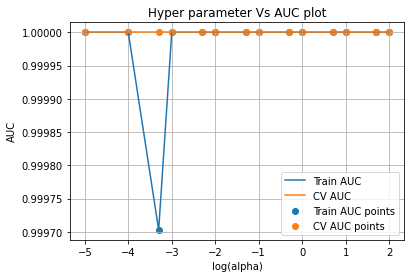

In [81]:

parameters = {'alpha':[0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}  
svm=SGDClassifier(loss="hinge")
clf=GridSearchCV(svm,parameters,cv=3, scoring='roc_auc',return_train_score=True)       #hyper parameter tuning

clf.fit(X, Y)    #fitting the SVM model with train data

results = pd.DataFrame.from_dict(clf.cv_results_)   #storing Gridsearch results

results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']       #storing required Gridsearch results in required variable
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
alpha =  results['param_alpha'].tolist()
print(" alpha--------->  ",alpha)
print(" log(alpha)------->  ",np.log10(alpha))

plt.plot(np.log10(alpha), train_auc, label='Train AUC')
plt.plot(np.log10(alpha), cv_auc, label='CV AUC')

plt.scatter(np.log10(alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(alpha), cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("log(alpha)")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()
#results.head

In [82]:
best_model=SGDClassifier(loss="hinge",alpha=1)   #creating model with best alpha
best_model.fit(X,Y)
best_model_accuracy=best_model.score(X, Y)
weights=best_model.coef_                    #obtaining weight vectors

#print(best_model_accuracy)

# 3) modifying the original data(pertubation) and with that fitting the best model again 

In [83]:
X_pretubated=X+0.01    #adding small noise to the data

In [84]:
best_model=SGDClassifier(loss="hinge",alpha=1)      #fitting the pertubated data with the best alpha model
best_model.fit(X_pretubated,Y)
best_model_accuracy_edited=best_model.score(X_pretubated, Y)
weights_edited=best_model.coef_


# 4) Checking deviations in metric and weights 

In [85]:
precentage_change_in_weights=(abs(weights-weights_edited)/weights)*100
absolute_precentage_change_in_weights=abs(precentage_change_in_weights)   #absolute value of percentage change in weight
sorted_percentage_weight_index=(-absolute_precentage_change_in_weights).argsort()    #soring index according to the decenting order of absolute value of percentage change in weight 

In [86]:
#printing the top 4 feature names which has most precentage change in weight after pertubation
for n, i in enumerate( sorted_percentage_weight_index[0]):
    if n <4:
        print(feature_names[i])

x*x
2*z+3*x*x
w
x


# Observation
- we can see that when adding small noise(pertubating) to the dataset, the **top features which has higher percentage change in their respective weights** are all the features((ie, **highly collinear features**) which are combination of other basic non collinear features.


- this is because these featuers are **combination of other non collinear features**.so adding pretubation to the non collinear features have effect on the collinear features with greater value.


- these collinear features ruins the **interpretability of the model**.


- so this pertubation method helps to find the highly collinear features and we can remove them to build robust model.